# Multiple Plot

`seaborn.FacetGrid` is a powerful tool in Seaborn that allows you to create a grid of plots based on one or more categorical variables. It is particularly useful when you want to visualize the distribution of data across different subsets of your dataset. The flexibility of FacetGrid makes it an excellent choice for exploring relationships between variables, visualizing multi-dimensional data, and comparing groups.

## 1. Understanding FacetGrid

A `FacetGrid` is essentially a grid of subplots, where each subplot (or facet) corresponds to a subset of the data defined by a combination of one or more categorical variables. Each facet shows the same plot type but for different levels of the categorical variables.

### Key Features of FacetGrid:
- **Faceting by row, column, and hue**: You can divide the data into facets by specifying categorical variables for the rows, columns, and optionally, a hue dimension.
- **Customizable plot types**: You can map different kinds of plots onto the grid, such as histograms, scatter plots, line plots, etc.
- **Shared axes**: Axes can be shared across rows or columns for easy comparison.
- **Easy customization**: Labels, titles, legends, and more can be easily customized.

## 2. Basic Usage of FacetGrid

To create a basic `FacetGrid`, you start by defining the grid with the categorical variables for rows, columns, and hue. Then, you map a plotting function onto the grid.

### Example: Creating a Simple FacetGrid

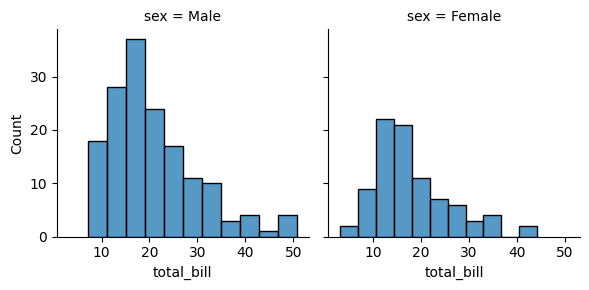

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data: Tips dataset
tips = sns.load_dataset('tips')

# Create a FacetGrid with one facet per 'sex'
g = sns.FacetGrid(tips, col='sex')
g.map(sns.histplot, 'total_bill')

# Display the plot
plt.show()

In this example:

- A `FacetGrid` is created with one facet per `sex` (col='sex').
- The grid uses the `histplot` function to create a histogram of the `total_bill` variable in each facet.

## 3. Faceting by Rows and Columns

You can create more complex grids by specifying both rows and columns for faceting, allowing you to visualize data across multiple dimensions.

### Example: Faceting by Rows and Columns

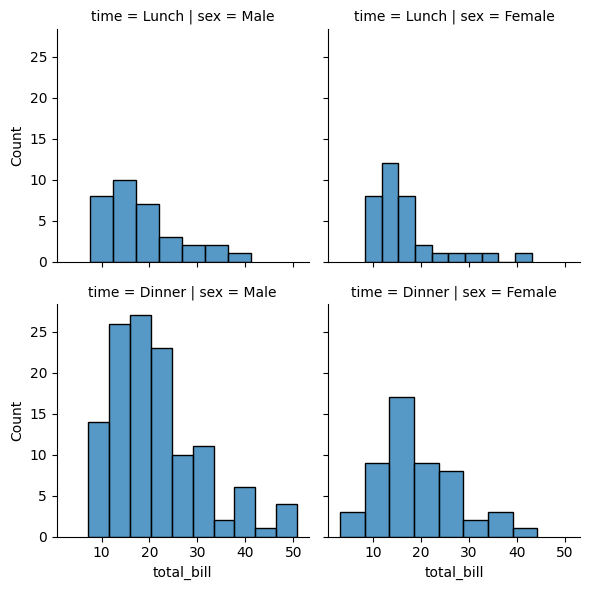

In [2]:
g = sns.FacetGrid(tips, col='sex', row='time')
g.map(sns.histplot, 'total_bill')

plt.show()

In this example:

- The data is faceted by `sex` (columns) and `time` (rows), creating a 2x2 grid.
- Each facet shows the distribution of `total_bill` for a different combination of `sex` and `time`.

## 4. Using the hue Parameter

The `hue` parameter adds another dimension to the grid by separating the data within each facet by a categorical variable. This is useful when you want to compare multiple categories within the same facet.

### Example: Faceting with Hue

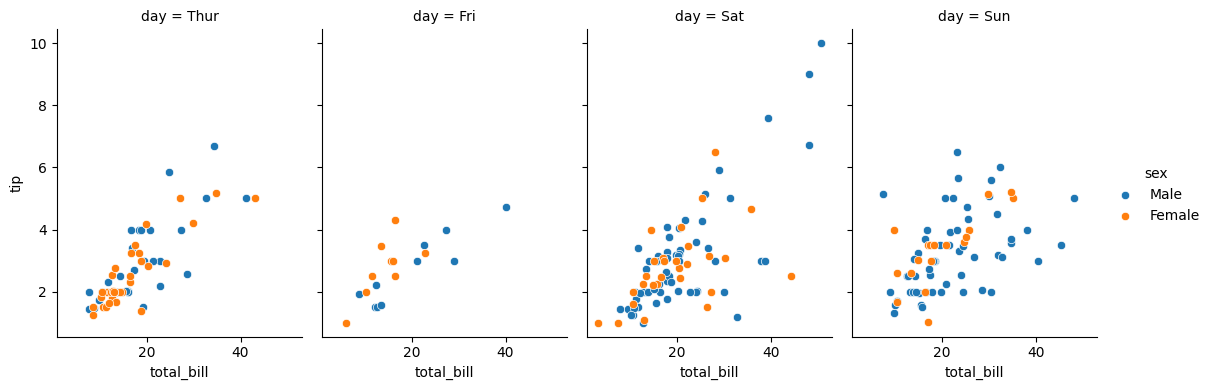

In [3]:
g = sns.FacetGrid(tips, col='day', hue='sex', height=4, aspect=0.7)
g.map(sns.scatterplot, 'total_bill', 'tip')
g.add_legend()

plt.show()

In this example:

- The data is faceted by `day` (columns), and `sex` is used to color the points within each facet.
- A scatter plot is used to visualize the relationship between `total_bill` and `tip` for each combination of `day` and `sex`.
- The legend is added using `g.add_legend()`.

## 5. Customizing the Grid Layout

You can control the size and aspect ratio of the plots in the grid using the `height` and `aspect` parameters. Additionally, you can control the number of columns per row using `col_wrap`.

### Example: Customizing the Grid Layout

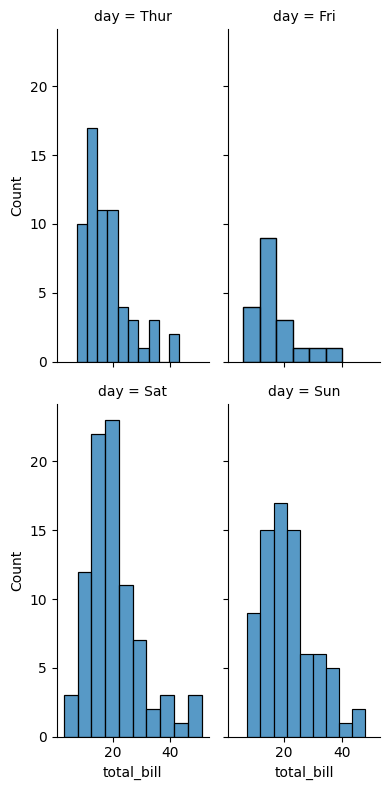

In [4]:
g = sns.FacetGrid(tips, col='day', height=4, aspect=0.5, col_wrap=2)
g.map(sns.histplot, 'total_bill')

plt.show()

In this example:

- `height=4` and `aspect=0.5` control the height and aspect ratio of each facet.
- `col_wrap=2` wraps the columns so that only two facets appear per row.

## 6. Different Plot Types with FacetGrid

You can map different types of plots onto a `FacetGrid`, such as histograms, scatter plots, line plots, KDE plots, etc. You can also chain multiple `map` calls to add different layers to the same plot.

### Example: Multiple Plot Types

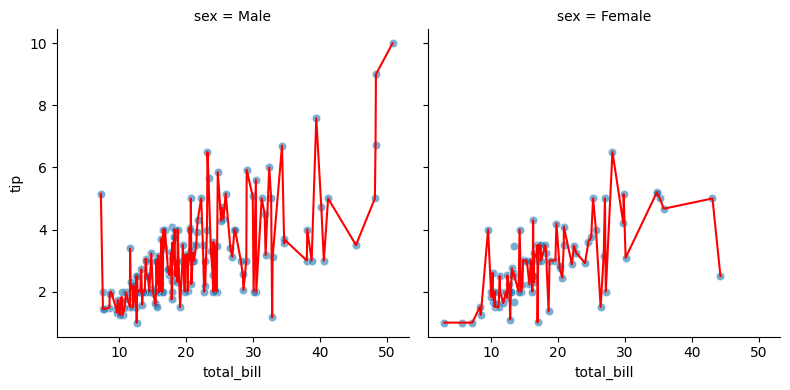

In [12]:
# Sample data: Tips dataset
tips = sns.load_dataset('tips')

# Create the FacetGrid
g = sns.FacetGrid(tips, col='sex', height=4, aspect=1)

# Add scatterplot and lineplot to the grid
g.map(sns.scatterplot, 'total_bill', 'tip', alpha=0.6)
g.map(sns.lineplot, 'total_bill', 'tip', color='red', errorbar=None)

# Display the plot
plt.show()


In this example:

- A scatter plot is first mapped onto the grid, followed by a line plot to show the trend.
- The line plot is drawn on top of the scatter plot using the same `FacetGrid`.

## 7. Customizing Axes and Labels

You can customize the axes labels, titles, and tick marks using methods like `set_axis_labels()`, `set_titles()`, `set_xticklabels()`, and `set_yticklabels()`.

### Example: Customizing Labels and Titles

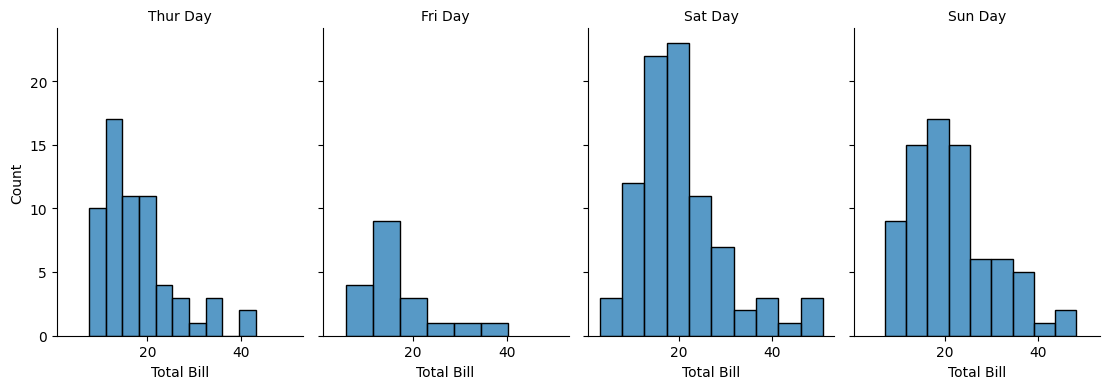

In [6]:
g = sns.FacetGrid(tips, col='day', height=4, aspect=0.7)
g.map(sns.histplot, 'total_bill')
g.set_axis_labels('Total Bill', 'Count')
g.set_titles('{col_name} Day')

plt.show()

In this example:

- `g.set_axis_labels()` sets the x and y axis labels.
- `g.set_titles()` customizes the title of each facet using the `{col_name}` placeholder.

## 8. Handling Multiple Variables

You can visualize relationships between multiple variables using the `row`, `col`, and `hue` parameters together. This creates complex grids that provide a multi-dimensional view of your data.

#### Example: Faceting with Multiple Variables

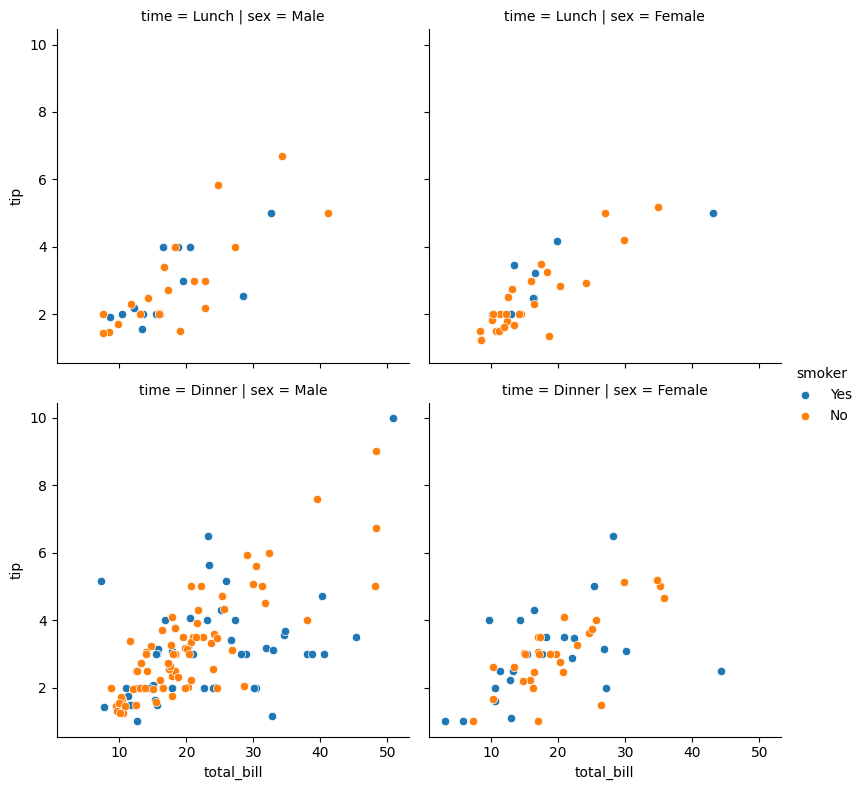

In [7]:
g = sns.FacetGrid(tips, col='sex', row='time', hue='smoker', height=4, aspect=1)
g.map(sns.scatterplot, 'total_bill', 'tip')
g.add_legend()

plt.show()

In this example:

- The grid is faceted by `sex` (columns), `time` (rows), and `smoker` (hue).
- Each facet shows the relationship between `total_bill` and `tip` for a different combination of these variables.
- The `hue` parameter adds another dimension by coloring the points based on whether the customer is a smoker.

#### Example: Customizing Labels and Titles

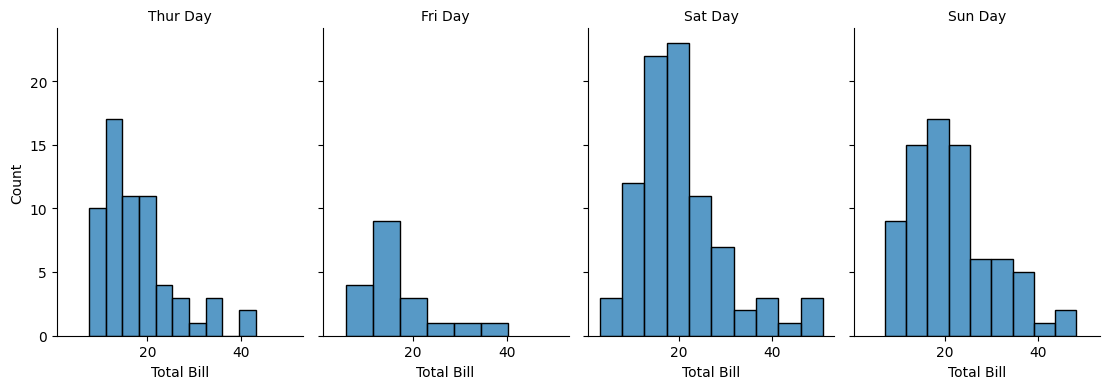

In [8]:

g = sns.FacetGrid(tips, col="day", height=4, aspect=0.7)
g.map(sns.histplot, "total_bill")
g.set_axis_labels("Total Bill", "Count")
g.set_titles("{col_name} Day")

plt.show()


In this example:
- `g.set_axis_labels()` sets the `x` and `y` axis labels.
- `g.set_titles()` customizes the title of each facet using the `{col_name}` placeholder.


## 9. Adding Marginal Histograms or KDE Plots

You can add marginal histograms or KDE plots to each facet using the marginal parameter with the `JointGrid` class (related to `FacetGrid`).

#### Example: Adding Marginal KDE Plots

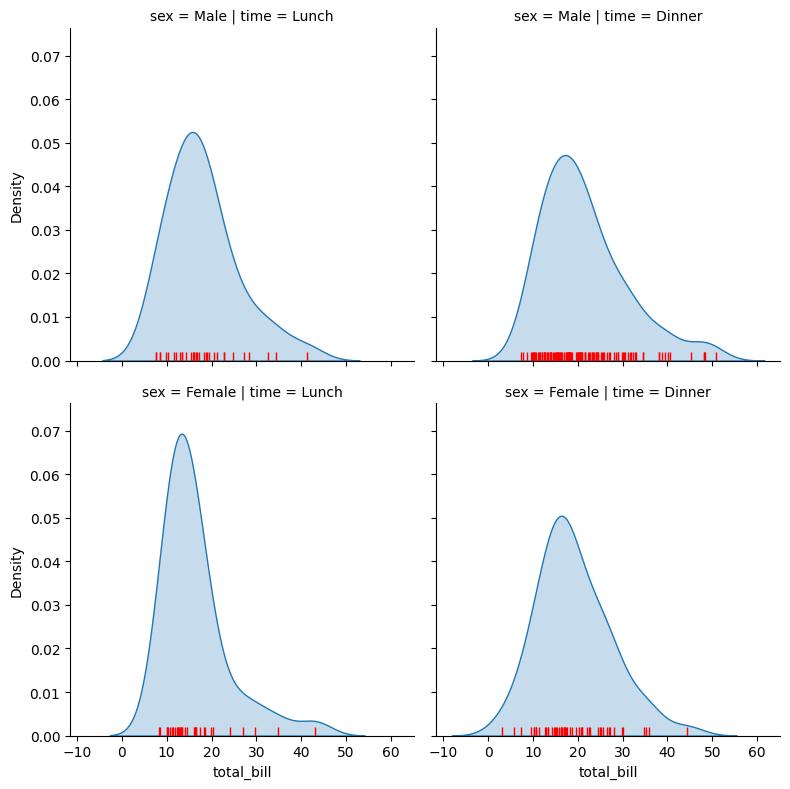

In [9]:
g = sns.FacetGrid(tips, col="time", row="sex", height=4, aspect=1)
g.map(sns.kdeplot, "total_bill", fill=True)
g.map(sns.rugplot, "total_bill", color="r")

plt.show()

In this example:
- A KDE plot with a rug plot (indicating data points) is mapped onto each facet, showing the distribution of `total_bill` for each combination of time and sex.


## 10. Customizing the Color Palette
You can customize the color palette for plots that use the hue parameter by passing a palette to `FacetGrid`.
#### Example: Customizing Color Palette


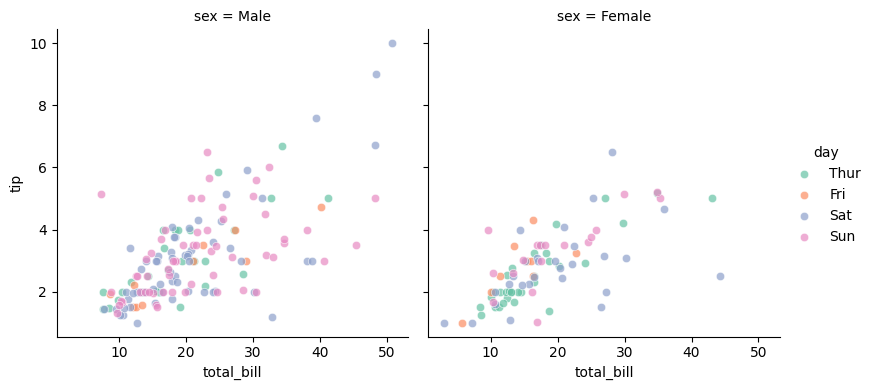

In [10]:
g = sns.FacetGrid(tips, col="sex", hue="day", palette="Set2", height=4, aspect=1)
g.map(sns.scatterplot, "total_bill", "tip", alpha=0.7)
g.add_legend()

plt.show()


In this example:
- The Set2 palette is used to `color-code` the points based on day.


## 11. Saving the Grid as an Image File
You can save the `FacetGrid` as an image file using `g.savefig()`.
#### Example: Saving the Grid

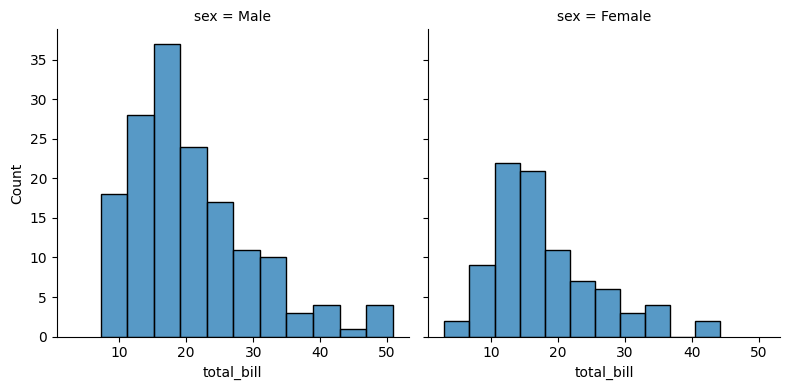

In [11]:

g = sns.FacetGrid(tips, col="sex", height=4, aspect=1)
g.map(sns.histplot, "total_bill")
g.savefig("facetgrid.png")


In this example:
- The grid is saved as a **PNG file** named `"facetgrid.png"`.


## Summary of Important Parameters and Methods
- `row`: Variable that will form the rows of the grid.
- `col`: Variable that will form the columns of the grid.
- `hue`: Variable that will be used to separate the data within each facet by color.
- `height` and `aspect`: Control the size and aspect ratio of the plots in the grid.
- `col_wrap`: Specifies the number of columns before wrapping to a new row.
- `map()`: Maps a plotting function to the grid.
- `set_axis_labels()`: Sets the labels for the x and y axes.
- `set_titles()`: Sets the titles for each facet.
- `add_legend()`: Adds a legend to the grid.
- `set_xticklabels()` and `set_yticklabels()`: Customizes the tick labels on the axes.
- `set_palette()`: Sets a color palette for the grid.
- `savefig()`: Saves the grid as an image file.

## Conclusion
`seaborn.FacetGrid` is an extremely versatile tool for creating complex, multi-dimensional plots. It allows you to facet your data across rows, columns, and hues, making it easy to explore and visualize relationships between variables. The ability to map different kinds of plots, customize labels, titles, and colors, and save the grid as an image makes `FacetGrid` an indispensable tool for exploratory data analysis and data visualization in Python.


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data: Tips dataset
tips = sns.load_dataset('tips')
print(tips)


     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


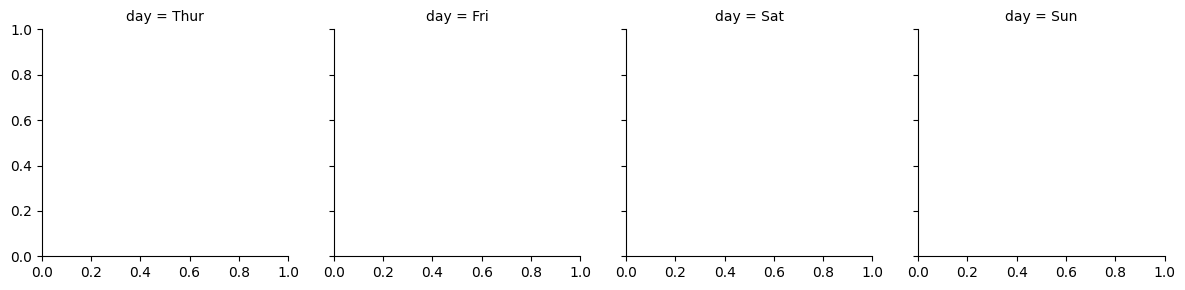

In [14]:
# Create a FacetGrid 
g = sns.FacetGrid(tips, col='day')

# Display the plot
plt.show()

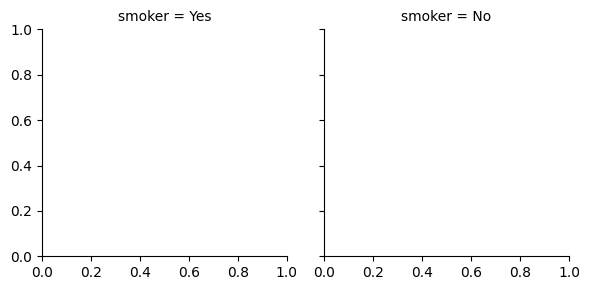

In [15]:
# Create a FacetGrid 
g = sns.FacetGrid(tips, col='smoker')


# Display the plot
plt.show()

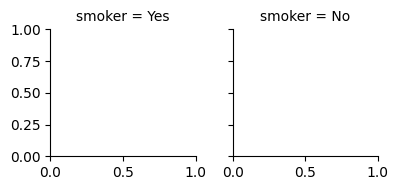

In [17]:
# Create a FacetGrid 
g = sns.FacetGrid(tips, col='smoker', height=2)


# Display the plot
plt.show()

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


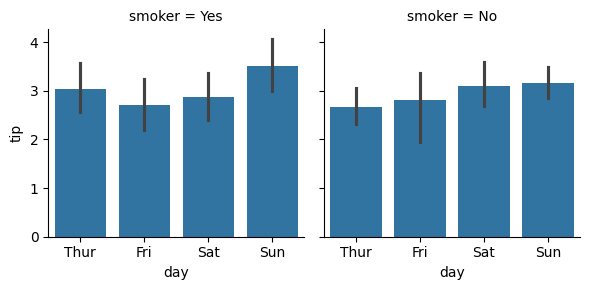

In [22]:
# Create a FacetGrid 
g = sns.FacetGrid(tips, col='smoker')
g.map(sns.barplot, 'day', "tip")

# Display the plot
plt.show()